In [52]:
# Logistic regression

# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.decomposition import PCA


In [3]:
# load the data set

test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")


# key things about the columns in the data set to help understand better
# survived - 0 = no, 1 = yes
# pclass - Assume 1 = first, 2 = business, coach = 3
# Name - name of the passenger
# SibSp - number of siblings / spouses abard the titanic
# Parch - number of parents / children aboard the titanic
# Ticket - ticket number
# Fare - Assume price paid for the ticket
# Cabin - cabin number
# Embarked - port of embarkation


In [4]:
# Check the data set
train_data.head()
# From the plot below, and the dataset, PassengerID, Name and ticket are redundant as these are non - numerical values. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# get stats about the data set
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# check for null values in the training data set
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# check for null values in the test data set
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

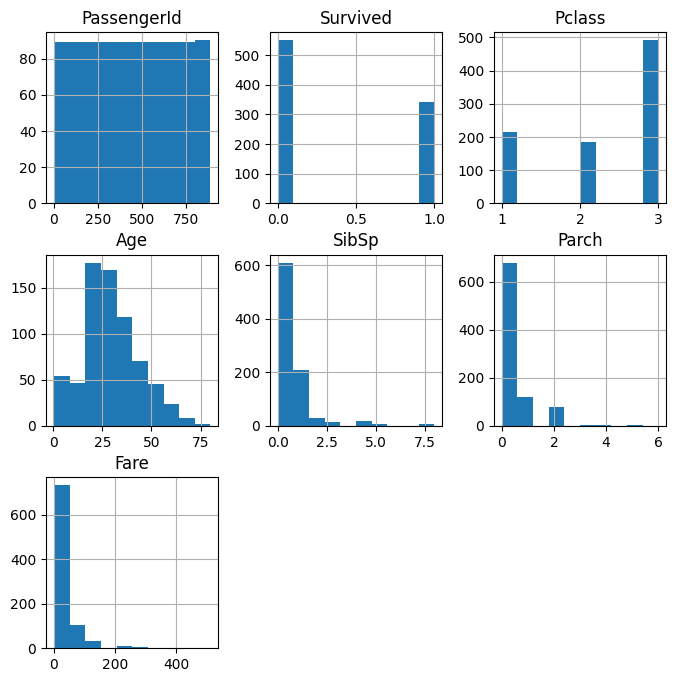

In [9]:
# Create a histogram to visualise the data as is
train_data.hist(bins=10, figsize=(8,8))
plt.show()

Text(0.5, 1.0, 'Correlation between numerical variables in the training data set')

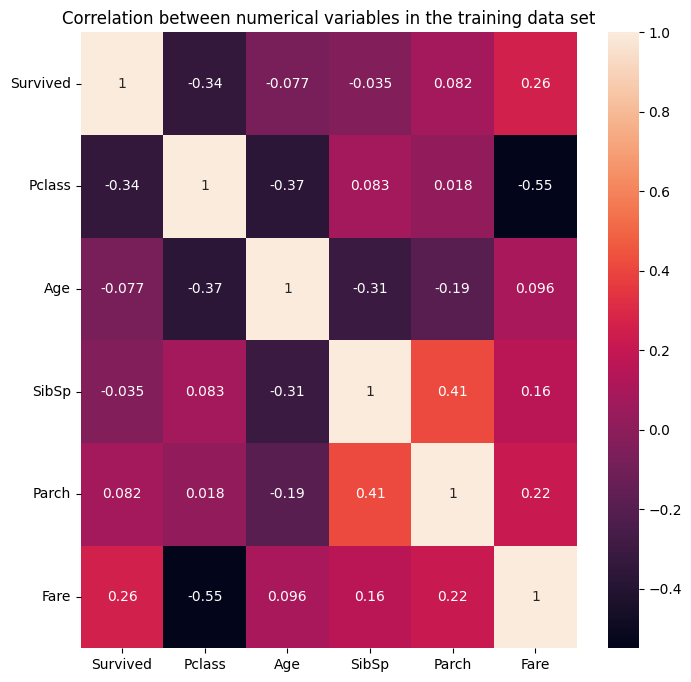

In [10]:
# create a correlation matrix
correlation_variables = train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_variables, annot=True)
plt.yticks(rotation = 'horizontal')
plt.xticks(rotation = 'horizontal')
plt.title("Correlation between numerical variables in the training data set")

In [11]:
# Create a copy of the training data set to perform cleaning and analysis
train_data_analyse = train_data.copy()

In [12]:
# drop the columns identified earlier
# the column Cabin can also be dropped as it contains approx 80% null values, and the remainder are alphanumeric
train_data_analyse = train_data_analyse.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [13]:
# Check how the data is
train_data_analyse.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
# Assign numerical values to Sex and Embarked, as these could easily be replaced with numerical values
# Using label encoder
sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()

train_data_analyse['Sex'] = sex_encoder.fit_transform(train_data_analyse['Sex'])
# where 0 = female, 1 = male

train_data_analyse['Embarked'] = sex_encoder.fit_transform(train_data_analyse['Embarked'])
# where 0 = C, 1 = S, 2 = Q

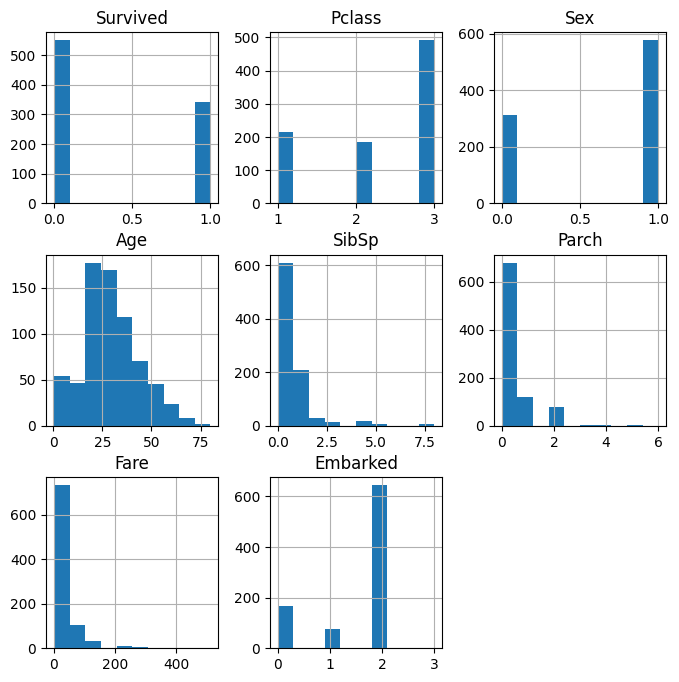

In [15]:
# Create a histogram to show the status of the new data
# Also create a correlation matrix
train_data_analyse.hist(bins=10, figsize=(8,8))
plt.show()


Text(0.5, 1.0, 'Correlation between numerical variables in the training data set')

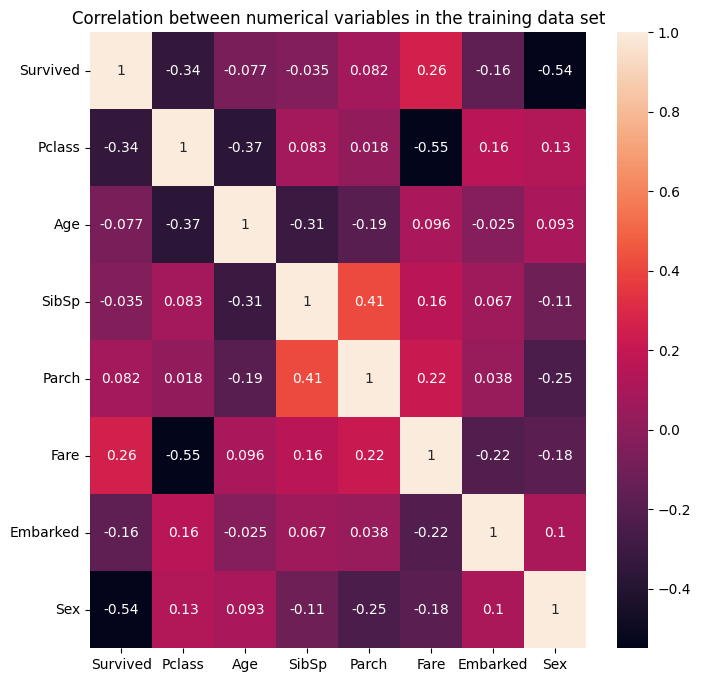

In [16]:
# create a correlation matrix as we have now have additonal numerical data points
correlation_variables2 = train_data_analyse[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Sex']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_variables2, annot=True)
plt.yticks(rotation = 'horizontal')
plt.xticks(rotation = 'horizontal')
plt.title("Correlation between numerical variables in the training data set")

In [17]:
# There are a number of of null values in the age data set... These will be replaced by the mean as the age is showing somewhat normal distribution
train_data_analyse['Age'] = train_data_analyse['Age'].fillna(train_data_analyse['Age'].mean())


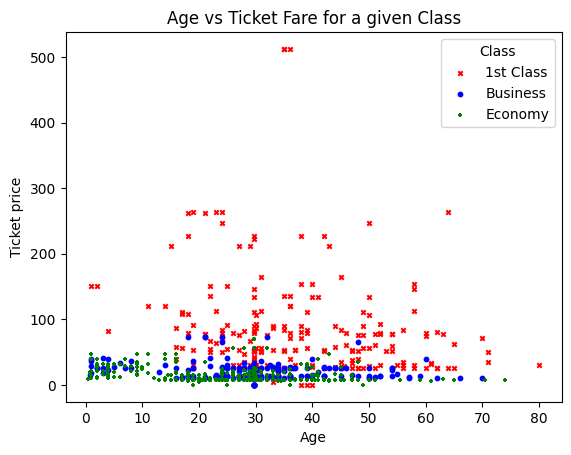

In [18]:
# Data analysis
# plot of age vs ticket price

x = train_data_analyse['Age']
y = train_data_analyse['Fare']
z = train_data_analyse['Pclass']

# Define colors for each class
colors = {1: 'red', 2: 'blue', 3: 'green'}
labels = {1: '1st Class', 2: 'Business', 3: 'Economy'}

# Create a scatter plot for each class
plt.scatter(x[z == 1], y[z == 1], c=colors[1], label=labels[1], marker = 'x', s=10)
plt.scatter(x[z == 2], y[z == 2], c=colors[2], label=labels[2], marker = 'o', s =10)
plt.scatter(x[z == 3], y[z == 3], c=colors[3], label=labels[3], marker = '+', s=10)

plt.title("Age vs Ticket Fare for a given Class")
plt.xlabel("Age")
plt.ylabel("Ticket price")

# Add a legend
plt.legend(title="Class")

plt.show()


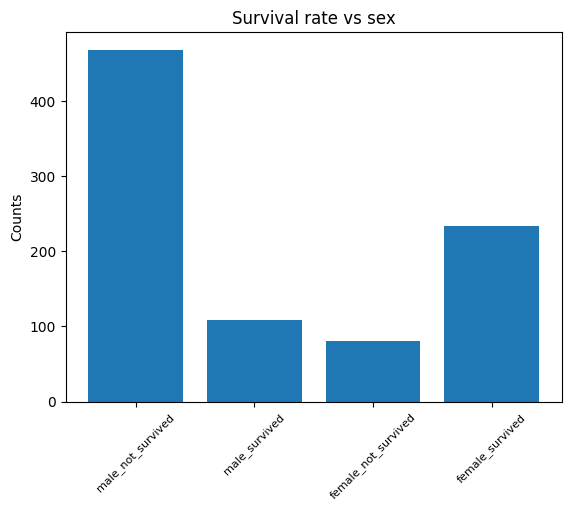

In [19]:
# overall plot of survival rates grouped by sex, 0 = female, 1 = male
male_survived = train_data_analyse[(train_data_analyse['Sex'] == 1) & (train_data_analyse['Survived'] == 1)]
male_not_survived = train_data_analyse[(train_data_analyse['Sex'] == 1) & (train_data_analyse['Survived'] == 0)]
female_survived = train_data_analyse[(train_data_analyse['Sex'] == 0) & (train_data_analyse['Survived'] == 1)]
female_not_survived = train_data_analyse[(train_data_analyse['Sex'] == 0) & (train_data_analyse['Survived'] == 0)]

# plotting a bar chart
cat = ['male_not_survived', 'male_survived', 'female_not_survived', 'female_survived']
counts = [len(male_not_survived), len(male_survived), len(female_not_survived), len(female_survived)]

plt.bar(cat, counts)
plt.ylabel('Counts')
plt.xticks(rotation = 45, fontsize = 8)
plt.title("Survival rate vs sex")
plt.show()


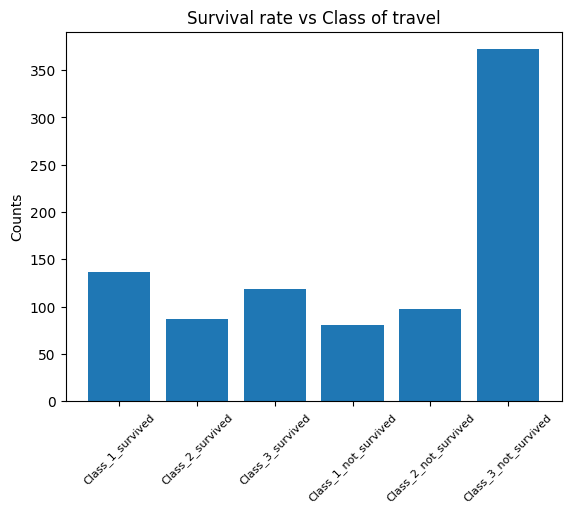

In [20]:
# survival by class
class_1_survived = train_data_analyse [(train_data_analyse['Pclass'] == 1) & (train_data_analyse['Survived'] == 1)]
class_2_survived = train_data_analyse [(train_data_analyse['Pclass'] == 2) & (train_data_analyse['Survived'] == 1)]
class_3_survived = train_data_analyse [(train_data_analyse['Pclass'] == 3) & (train_data_analyse['Survived'] == 1)]
class_1_not_survived = train_data_analyse [(train_data_analyse['Pclass'] == 1) & (train_data_analyse['Survived'] == 0)]
class_2_not_survived = train_data_analyse [(train_data_analyse['Pclass'] == 2) & (train_data_analyse['Survived'] == 0)]
class_3_not_survived = train_data_analyse [(train_data_analyse['Pclass'] == 3) & (train_data_analyse['Survived'] == 0)]

# plotting a bar chart
cat2 = ['Class_1_survived', 'Class_2_survived', 'Class_3_survived', 'Class_1_not_survived', 'Class_2_not_survived', 'Class_3_not_survived']
count2 = [len(class_1_survived), len(class_2_survived), len(class_3_survived), len(class_1_not_survived), len(class_2_not_survived), len(class_3_not_survived)]

plt.bar(cat2, count2)
plt.ylabel('Counts')
plt.xticks(rotation = 45, fontsize = 8)
plt.title("Survival rate vs Class of travel")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

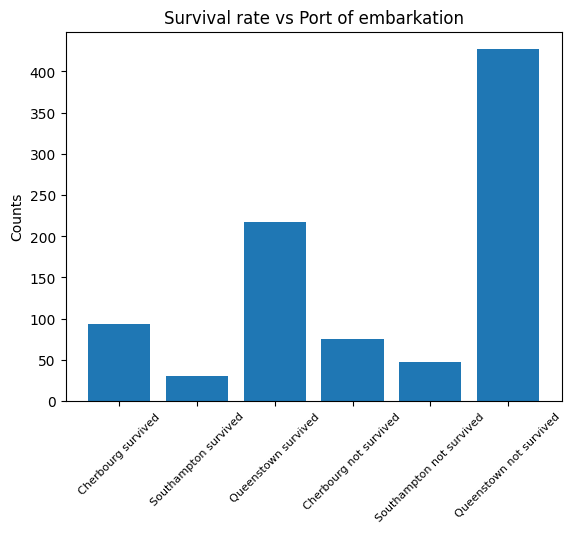

In [21]:
# embarkation analysis
c_survived = train_data_analyse [(train_data_analyse['Embarked'] == 0) & (train_data_analyse['Survived'] == 1)]
s_survived = train_data_analyse [(train_data_analyse['Embarked'] == 1) & (train_data_analyse['Survived'] == 1)]
q_survived = train_data_analyse [(train_data_analyse['Embarked'] == 2) & (train_data_analyse['Survived'] == 1)]
c_not_survived = train_data_analyse [(train_data_analyse['Embarked'] == 0) & (train_data_analyse['Survived'] == 0)]
s_not_survived = train_data_analyse [(train_data_analyse['Embarked'] == 1) & (train_data_analyse['Survived'] == 0)]
q_not_survived = train_data_analyse [(train_data_analyse['Embarked'] == 2) & (train_data_analyse['Survived'] == 0)]

# where c=0, s=1, q=2, Cherbourg, Southampton, Queenstown

# create the bar chart
cat3 = ['Cherbourg survived', 'Southampton survived', 'Queenstown survived', 'Cherbourg not survived', 'Southampton not survived', 'Queenstown not survived']
count3 = [len(c_survived),len(s_survived), len(q_survived), len(c_not_survived), len(s_not_survived), len(q_not_survived)]

plt.bar(cat3, count3)
plt.ylabel('Counts')
plt.xticks(rotation = 45, fontsize = 8)
plt.title("Survival rate vs Port of embarkation")
plt.show


In [22]:
# training the model
# firstly the test data has to be cleaned the same way the training data was cleaned

test_data_clean = test_data.copy()


In [23]:
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [24]:
# drop non numerical columns
# drop the columns identified earlier
test_data_clean = test_data_clean.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [25]:
test_data_clean.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [26]:
# Assign numerical values to Sex and Embarked, as these could easily be replaced with numerical values
# Using thre same label encoder as used before so the transformed values are the same

test_data_clean['Sex'] = sex_encoder.fit_transform(test_data_clean['Sex'])
# where 0 = female, 1 = male 

test_data_clean['Embarked'] = sex_encoder.fit_transform(test_data_clean['Embarked'])
# where 0 = C, 1 = S, 2 = Q 

In [27]:
test_data_clean.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
5,3,1,14.0,0,0,9.2250,2
6,3,0,30.0,0,0,7.6292,1
7,2,1,26.0,1,1,29.0000,2
8,3,0,18.0,0,0,7.2292,0
9,3,1,21.0,2,0,24.1500,2


In [28]:
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


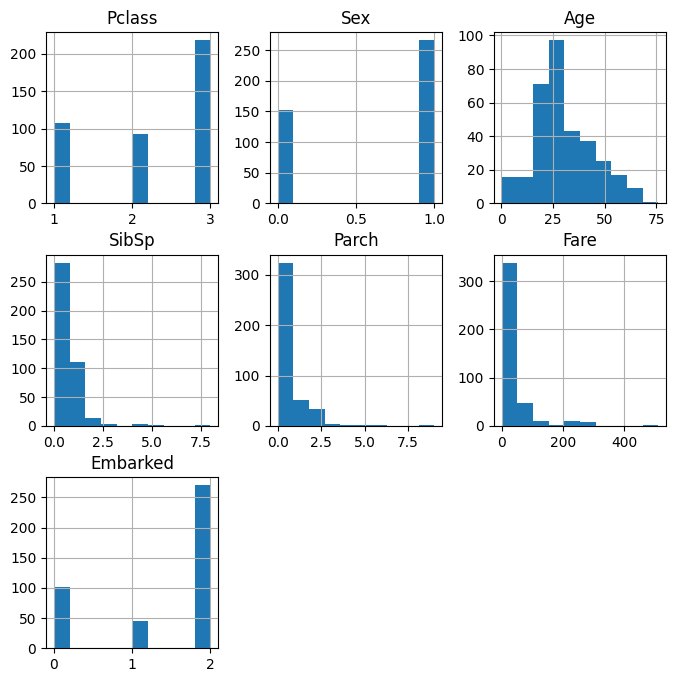

In [29]:
# create a histogram to show the status of the test data
test_data_clean.hist(bins=10, figsize=(8,8))
plt.show()

In [30]:
# The age shows a normal distribution, so null values will be replaced by the mean
# the fare price has one null value. The distribution is skewedt to the left, so i will use median, although this is not expected to make a massive difference as its only one data point
test_data_clean['Age'] = test_data_clean['Age'].fillna(test_data_clean['Age'].mean())
test_data_clean['Fare'] = test_data_clean['Fare'].fillna(test_data_clean['Fare'].median())



In [31]:
# Check the data again for null values
test_data_clean.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
# now that both data sets are clean, the values have to be scaled
# a new data frame will be created so that the previous data frames can stay in their format, in case of any changes above this line
test_data_scaled = test_data_clean.copy()
train_data_scaled = train_data_analyse.copy()


In [33]:
# using standard scaler
scaler = StandardScaler()

# the survived column is the target column, and should not be scaled, thus remove from the training data set
target_column = 'Survived'

# separate the column from the main data frame, and create new data frame to avoid confusion
train_features = train_data_scaled.drop(columns=[target_column])
test_features = test_data_scaled.copy()



In [34]:
# Scale the data sets
train_features_scaled =scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# convert scaled features back to pd dataframe
train_features_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
test_features_scaled = pd.DataFrame(test_features_scaled, columns=test_features.columns)

#Attach previosuly removed survived column
train_data_model = pd.concat([train_features_scaled, train_data_scaled[target_column].reset_index(drop=True)], axis=1)
test_data_model = test_features.copy()


In [35]:
train_data_model.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000
mean,-8.772133e-17,-1.156327e-16,2.232906e-16,4.386066e-17,5.382900e-17,3.987333e-18,-3.588600e-17,0.383838
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,0.486592
min,-1.566107e+00,-1.355574e+00,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-1.938460e+00,0.000000
25%,-3.693648e-01,-1.355574e+00,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-6.786732e-01,0.000000
50%,8.273772e-01,7.376951e-01,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01,5.811139e-01,0.000000
75%,8.273772e-01,7.376951e-01,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,5.811139e-01,1.000000
max,8.273772e-01,7.376951e-01,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.840901e+00,1.000000


In [36]:
test_data_model.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,0.392344,35.576535,1.401914
std,0.841838,0.481622,12.634534,0.896760,0.981429,55.850103,0.854496
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [37]:
# define training and testing variable
x_train = train_data_model[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train_data_model[['Survived']]
x_test = test_data_model[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# y_test doesnt exist as that is what we are trying to predict

In [38]:
# train the log reg model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/Users/dawoodbutt/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
y_pred_logistic = log_reg.predict(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

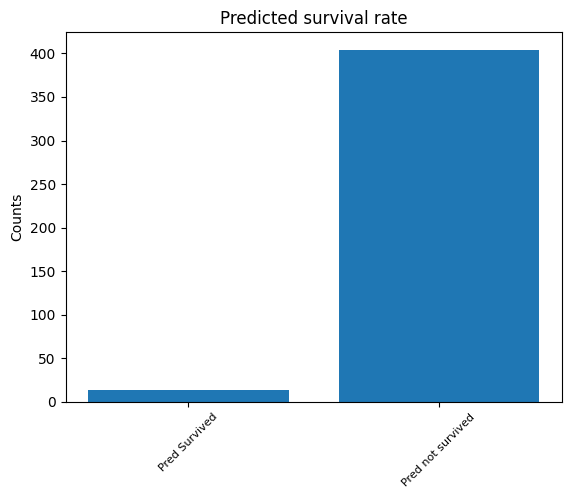

In [40]:
# put into a dataframe and create a bar chart showing dead vs alive
logistic_pred = pd.DataFrame({'Predicted values': y_pred_logistic})


survived_pred = logistic_pred [(logistic_pred['Predicted values'] == 1)]
not_survived_pred = logistic_pred [(logistic_pred['Predicted values'] == 0)]

pred_values = ['Pred Survived', 'Pred not survived']
pred_count = [len(survived_pred), len(not_survived_pred)]


plt.bar(pred_values, pred_count)
plt.ylabel('Counts')
plt.xticks(rotation = 45, fontsize = 8)
plt.title("Predicted survival rate")
plt.show

In [41]:
# using train test split to apply log reg to the training data set
#using x= x_train and y=y_train as these values have been previously specified for the training data set
x_train_tts, x_test_tts, y_train_tts, y_test_tts = train_test_split(x_train, y_train, test_size=0.2, random_state=36)



In [42]:
# Create a logistic regression model
log_reg_tts = LogisticRegression()
log_reg_tts.fit(x_train_tts, y_train_tts)

/Users/dawoodbutt/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [43]:
# Make predictions
y_pred_tts = log_reg_tts.predict(x_test_tts)


<function matplotlib.pyplot.show(close=None, block=None)>

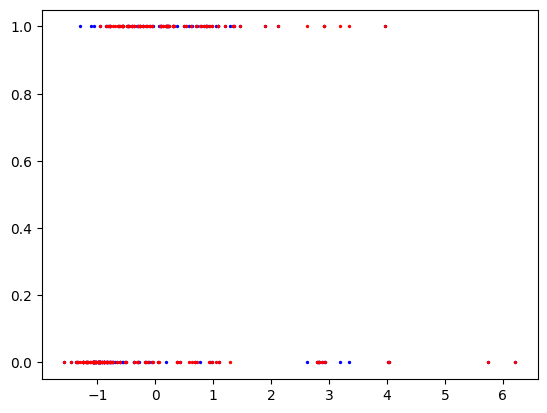

In [ ]:
# plotting predicted vs actual
# Apply PCA to reduce components to 1
pca = PCA(n_components=1)
x_pca = pca.fit_transform(x_test_tts).flatten()  # Flatten to a 1D array

# create a dataframe for x, y, and y pred
tts_plot = pd.DataFrame({'x test': x_pca, 'Actual Value': y_test_tts.values.ravel(), 'Predicted value': y_pred_tts})
tts_plot

# plotting the values
plt.scatter(x_pca, y_test_tts, color = 'blue', s=2)
plt.scatter(x_pca, y_pred_tts, color = 'red', s=2)
plt.show

# The scatter plot isnt best visualisation tool, as it doesnt give the relevant info - there are a lot of values which are overlapping
# as this does not give any relevant info, an accuracy score might be better suited


In [60]:
# Accuracy score
accuracy = accuracy_score(y_test_tts, y_pred_tts)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


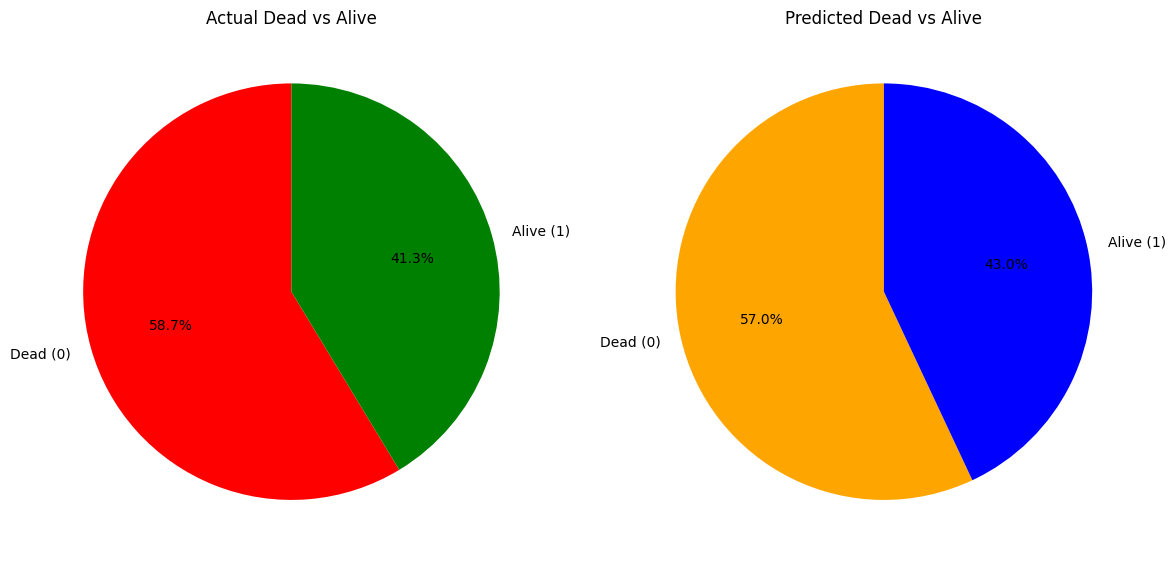

In [ ]:
# create a pie chart comparing actual vs pred
actual_count = np.bincount(y_test_tts.values.ravel())
pred_count = np.bincount(y_pred_tts)

# create labels
# Labels for the chart
chart_labels = ['Dead (0)', 'Alive (1)']

# create a plot
# Create a figure with 2 subplots for side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Actual values pie chart
axes[0].pie(actual_count, labels=chart_labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axes[0].set_title('Actual Dead vs Alive')

# Predicted values pie chart
axes[1].pie(pred_count, labels=chart_labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
axes[1].set_title('Predicted Dead vs Alive')

# Display the charts
plt.tight_layout()
plt.show()

# The chart overall shows that the model performs relatively ok, with a difference of only 1.3 percentage points. However the accuracy os 80%, meaning that 80% of values were predicted correctly. 

In [61]:
# using k fold cross validation to apply log reg model and compare to train test split
#using x= x_train and y=y_train as these values have been previously specified for the training data set

# set up K Folds
k_fold = KFold(n_splits=5, shuffle=True, random_state=45)

# create log reg model
log_reg_kfold = LogisticRegression()

# performing the cross validation
k_fold_score = cross_val_score(log_reg_kfold, x_train, y_train.values.ravel(), cv=k_fold, scoring='accuracy')

print("Cross-Validation Scores:", k_fold_score) # accuracy for each of the folds
print("Mean Accuracy - k fold:", np.mean(k_fold_score)) # average accuracy
print("Standard Deviation - k fold:", np.std(k_fold_score)) #how much each fold varies from the mean. A low score means the model performs consistly well across all folds

Cross-Validation Scores: [0.84357542 0.80337079 0.8258427  0.73595506 0.80898876]
Mean Accuracy - k fold: 0.8035465444730401
Standard Deviation - k fold: 0.03659969161303307


In [ ]:
# both the log regression and the k fold cross validation perform similarly
# This indicates that the score may be limited to the data set used - the data set is relatively small
# another way to improve the score could be to only select certain features from the available variables to carry out the analysis 